<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-deep-learning/blob/main/Image_ConvolutionFiltering_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fetch image in grayscale format
image = cv2.imread('/content/drive/MyDrive/images/images280x280/b.jpg', cv2.IMREAD_GRAYSCALE)
print(image)

[[ 34  34  34 ... 122 125 128]
 [ 34  34  34 ... 124 128 130]
 [ 34  34  34 ... 127 131 135]
 ...
 [ 24  24  24 ...  24  24  24]
 [ 22  22  21 ...  22  22  22]
 [ 22  22  21 ...  21  21  21]]


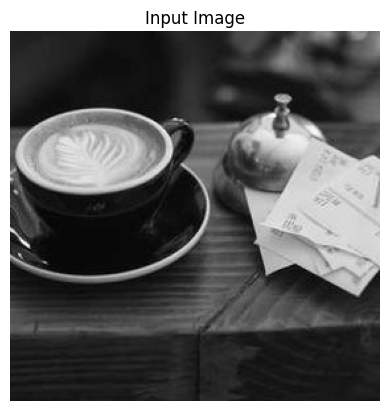

In [ ]:
# Grayscale image display with Matplot library
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

In [ ]:
# Resize image to form (batch_size, channels, height, width) for PyTorch
print(image.shape)
image = np.expand_dims(image, axis=0)
print(image.shape)
image = np.expand_dims(image, axis=0)
print(image.shape)
print(image)

(280, 280)
(1, 280, 280)
(1, 1, 280, 280)
[[[[ 34  34  34 ... 122 125 128]
   [ 34  34  34 ... 124 128 130]
   [ 34  34  34 ... 127 131 135]
   ...
   [ 24  24  24 ...  24  24  24]
   [ 22  22  21 ...  22  22  22]
   [ 22  22  21 ...  21  21  21]]]]


In [ ]:
# Convert image to float32 type
image = torch.tensor(image, dtype=torch.float32)
print(image.shape)
print(image)

torch.Size([1, 1, 280, 280])
tensor([[[[ 34.,  34.,  34.,  ..., 122., 125., 128.],
          [ 34.,  34.,  34.,  ..., 124., 128., 130.],
          [ 34.,  34.,  34.,  ..., 127., 131., 135.],
          ...,
          [ 24.,  24.,  24.,  ...,  24.,  24.,  24.],
          [ 22.,  22.,  21.,  ...,  22.,  22.,  22.],
          [ 22.,  22.,  21.,  ...,  21.,  21.,  21.]]]])


In [ ]:
# Sharpen filter
sharpen_filter = torch.tensor([[[[ 0, -1,  0],
                                 [-1,  5, -1],
                                 [ 0, -1,  0]]]], dtype=torch.float32)


# Vertical edge detection filter
edge_detection_filter = torch.tensor([[[[-1, -1, -1],
                                        [0 ,  0,  0],
                                        [1 ,  1,  1]]]], dtype=torch.float32)


# Uniform Blur filter
blur_filter = torch.tensor([[[[1/9, 1/9, 1/9],
                              [1/9, 1/9, 1/9],
                              [1/9, 1/9, 1/9]]]], dtype=torch.float32)


# Feature Emboss Filter
emboss_filter = torch.tensor([[[[-2, -1, 0],
                                [-1,  1, 1],
                                [ 0,  1, 2]]]], dtype=torch.float32)


# Laplacian filter for edge detection
laplacian_filter = torch.tensor([[[[ 0, -1,  0],
                                   [-1,  4, -1],
                                   [ 0, -1,  0]]]], dtype=torch.float32)

filter=laplacian_filter

In [ ]:
# Apply the convolution operation to the image using the specified filter, with a stride of 1 and padding of 1
output_image = torch.nn.functional.conv2d(image, filter, stride=1, padding=1)
print(output_image.shape)
print(output_image)

torch.Size([1, 1, 280, 280])
tensor([[[[ 68.,  34.,  35.,  ..., 120., 122., 257.],
          [ 34.,   0.,   1.,  ...,  -2.,   2., 129.],
          [ 34.,   0.,   1.,  ...,  -2.,  -2., 140.],
          ...,
          [ 22.,  -1.,   0.,  ...,  -2.,  -2.,  22.],
          [ 20.,  -1.,  -4.,  ...,  -1.,  -1.,  21.],
          [ 44.,  23.,  20.,  ...,  21.,  20.,  41.]]]])


In [ ]:
# Convert output image to uint8 type
output_image = output_image[0, 0].detach().numpy()
print(output_image.shape)
print(output_image)

(280, 280)
[[ 68.  34.  35. ... 120. 122. 257.]
 [ 34.   0.   1. ...  -2.   2. 129.]
 [ 34.   0.   1. ...  -2.  -2. 140.]
 ...
 [ 22.  -1.   0. ...  -2.  -2.  22.]
 [ 20.  -1.  -4. ...  -1.  -1.  21.]
 [ 44.  23.  20. ...  21.  20.  41.]]


In [ ]:
# Clip the pixel values of the output image to the range [0, 255]
output_image = np.clip(output_image, 0, 255).astype(np.uint8)
print(output_image.shape)
print(output_image)

(280, 280)
[[ 68  34  35 ... 120 122 255]
 [ 34   0   1 ...   0   2 129]
 [ 34   0   1 ...   0   0 140]
 ...
 [ 22   0   0 ...   0   0  22]
 [ 20   0   0 ...   0   0  21]
 [ 44  23  20 ...  21  20  41]]


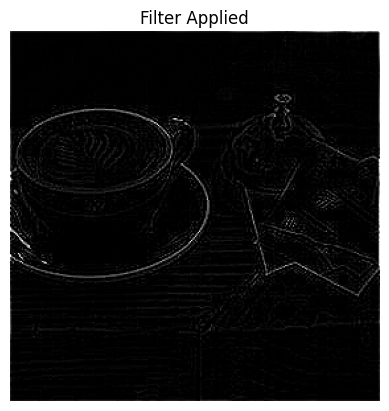

In [ ]:
# Grayscale image display with Matplot library
plt.imshow(output_image, cmap='gray')
plt.title('Filter Applied')
plt.axis('off')
plt.show()

In [ ]:
# Save the final image
cv2.imwrite('a_filtered.png', output_image)

True